In [1]:
import numpy as np
import pandas as pd

In [2]:
#uploading the csv file and converting it into UTF8
df = pd.read_csv(r'D:\neha\ml projects\sms spam classfier\_sms_classifier_dataset\spam.csv', encoding='latin-1')

In [3]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.sample(10)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1080,ham,You tell what happen dont behave like this to ...,NaN,NaN,NaN
1535,spam,You have won a Nokia 7250i. This is what you g...,NaN,NaN,NaN
5299,ham,Well good morning mr . Hows london treatin' ya...,NaN,NaN,NaN
554,ham,IÛ÷ll have a look at the frying pan in case i...,NaN,NaN,NaN
5152,ham,Idk. I'm sitting here in a stop and shop parki...,NaN,NaN,NaN
954,spam,Filthy stories and GIRLS waiting for your,NaN,NaN,NaN
1972,ham,Yes but can we meet in town cos will go to gep...,NaN,NaN,NaN
5281,ham,"And how you will do that, princess? :)",NaN,NaN,NaN
580,ham,Huh so early.. Then Ì_ having dinner outside i...,NaN,NaN,NaN
944,ham,I sent my scores to sophas and i had to do sec...,NaN,NaN,NaN


In [5]:
#1. data cleaning to remove the NaN values
# 2. EDA exploratory data analysis
# 3. Text preprocessing
# 4. Model building
# 5. Evaluation
#6. Improvement
# 7. Website
# 8. Deployment

## 1. DATA CLEANING

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.sample(5)


,v1,v2
432,spam,Congrats! Nokia 3650 video camera phone is you...
2503,ham,Fwiw the reason I'm only around when it's time...
2030,ham,"Ugh y can't u just apologize, admit u were wro..."
321,ham,Hey... Why dont we just go watch x men and hav...
1380,ham,i dnt wnt to tlk wid u


In [9]:
#renaming the columns
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
446,ham,"Well done, blimey, exercise, yeah, i kinda rem..."
2341,ham,Tell dear what happen to you. Why you talking ...
4745,ham,Orh i tot u say she now still dun believe.
3662,ham,Frnd s not juz a word.....not merely a relatio...
5560,ham,Anything lor. Juz both of us lor.


In [10]:
#applying label encoding
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])
#0 is for ham and 1 is for spam

In [12]:
df.head(5)


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#checking for the missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#check for duplicate values
df.duplicated().sum()


403

In [15]:
# remove duplicates
df= df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

## 2. EDA


In [18]:
#TO get an understanding of the dataset the EDA part is performed

In [19]:
#1. check the percentage of spam and ham data
# 2. visually representing the percentage
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

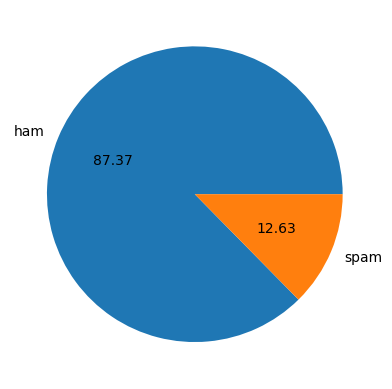

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
#to remove the extra piece of code
plt.show()

In [22]:
#data is imbalanced

In [23]:
import nltk


In [24]:
nltk.download('punkt', force=True)

[nltk_data] Downloading package punkt to C:\Users\Neha
[nltk_data]     Kasera\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [25]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Neha
[nltk_data]     Kasera\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [26]:
#extracting the number of characters present in the sentence
df['num_characters']=df['text'].apply(len)

In [27]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
#fetching the number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
#using describe to know the data characteristics of newly added columns
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#analysing ham and spam differently
#ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
#spam meesages are a litte big
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [35]:
#plotting histogram to see the classification
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

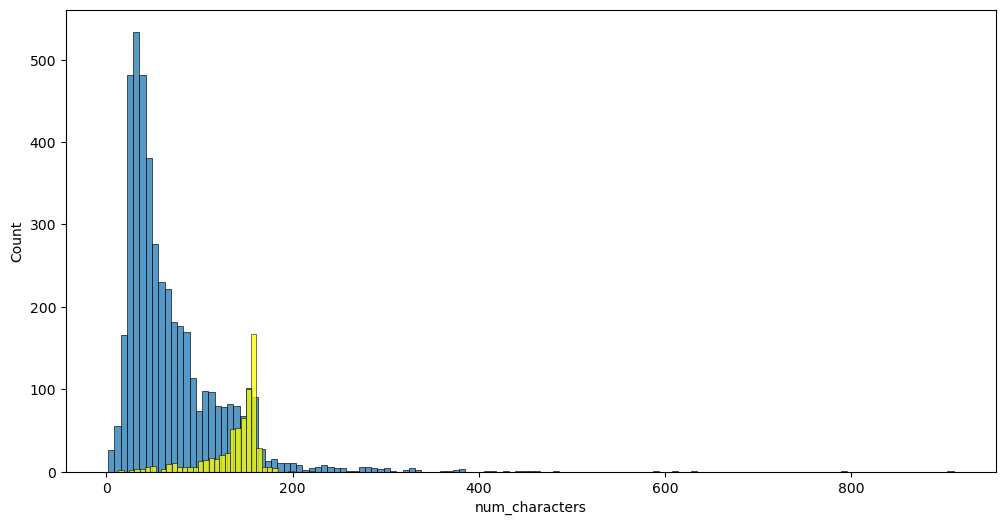

In [36]:
#for ham and spam=1
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='yellow')


<Axes: xlabel='num_words', ylabel='Count'>

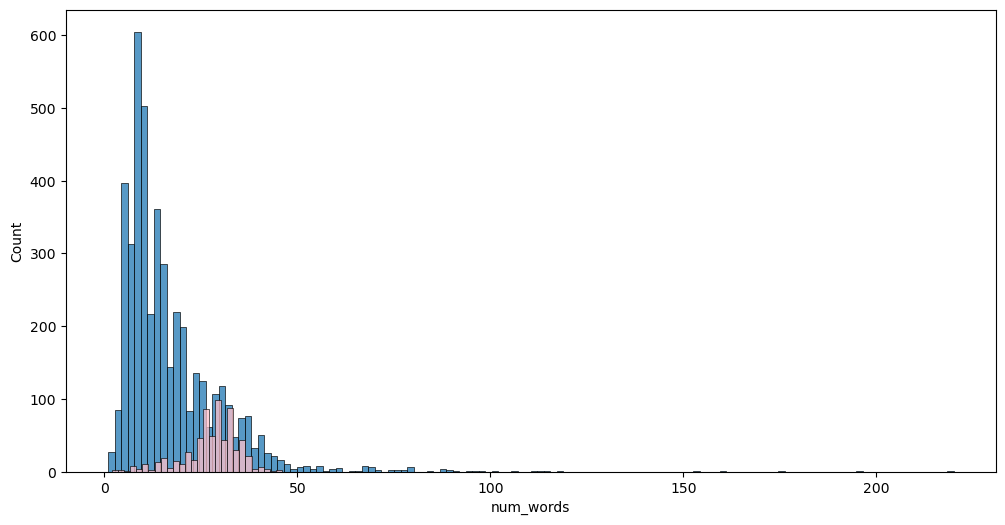

In [37]:
#to check for number of words
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='pink')


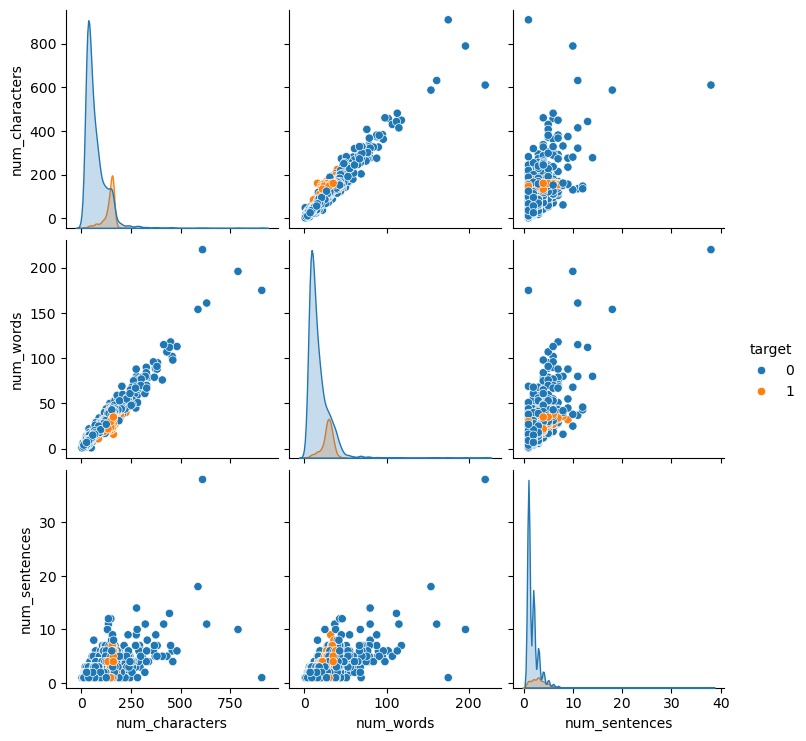

In [38]:
#0 is ham and 1 is spam
sns.pairplot(df, hue='target')

<Axes: >

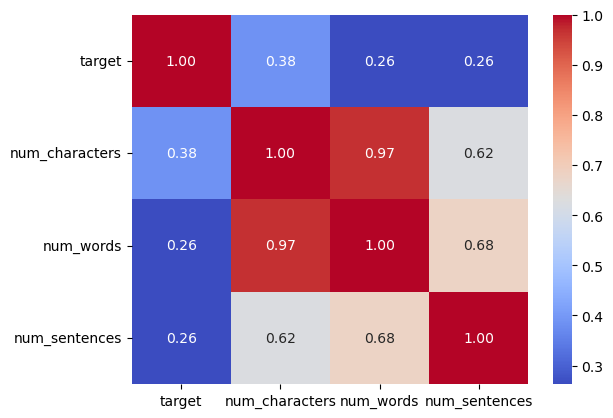

In [39]:
#to find the correlation coefficient and visaulize using heatmap
#if correlation coeff > 0.9 then data is multicolinear
sns.heatmap(df.corr(numeric_only=True), annot=True,cmap='coolwarm', fmt=".2f")

## 3. Data Preprocessing

The steps involved are:

1. **Lower case** – Convert all text to lowercase for uniformity.
2. **Tokenization** – Break text into individual words or tokens.
3. **Removing special characters** – Eliminate non-alphanumeric symbols.
4. **Removing stop words and punctuation** – Remove common filler words and punctuation.
5. **Stemming** – Reduce words to their root form (e.g., "running" → "run").


In [40]:
nltk.download('stopwords')
import string
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to C:\Users\Neha
[nltk_data]     Kasera\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [42]:
def transform_text(text):
    #to convert into uniformity
    text= text.lower()
    #to tokenize the text
    text = nltk.word_tokenize(text)

    #to remove special characters
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    #list is always copied via cloning as it is immutable
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


In [43]:
df['transformed_text']=df['text'].apply(transform_text)

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
#creating word cloud of the spam messages (1). the most repeated words will be displayed in large letters
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [46]:
spam_wc= wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

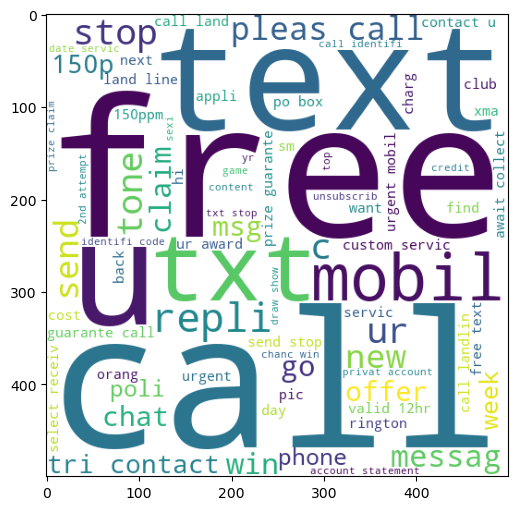

In [47]:
plt.figure(figsize=(20,6))
plt.imshow(spam_wc)

In [48]:
#for ham messages
ham_wc= wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

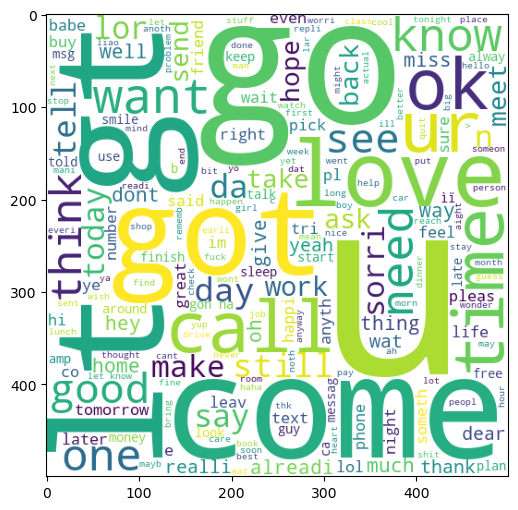

In [49]:
plt.figure(figsize=(20,6))
plt.imshow(ham_wc)

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
#displaying the top repeated words in both ham and spam
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [52]:
len(spam_corpus)

9939

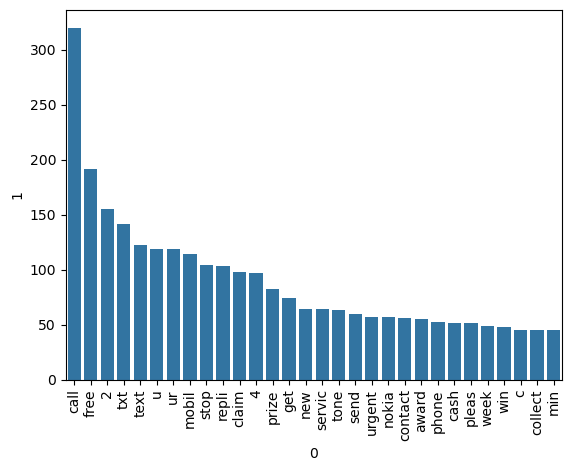

In [53]:
#creates the word dictionary storing the count of words for spam
from collections import Counter
# Create a DataFrame from the most common words
top_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30))

# Plot with correct keyword arguments
sns.barplot(x=top_words_df[0], y=top_words_df[1])

plt.xticks(rotation='vertical')
plt.show()

In [54]:
#displaying the top repeated words in both ham and spam
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


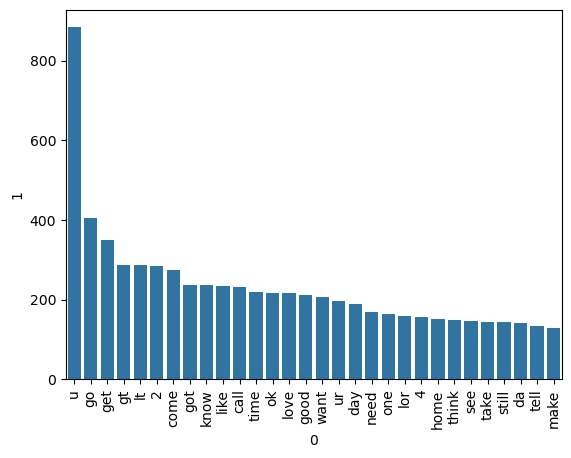

In [55]:
#creates the word dictionary storing the count of words for ham
from collections import Counter
# Create a DataFrame from the most common words
top_words_df = pd.DataFrame(Counter(ham_corpus).most_common(30))

# Plot with correct keyword arguments
sns.barplot(x=top_words_df[0], y=top_words_df[1])

plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [56]:
#text vectroization (converting them to numbers in form of vectors)
#using bag of words###using this
#or TfiDF vectorization technique 
#will use naive bayes algo as it works best for text
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [57]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)

In [58]:
X= tfidf.fit_transform(df['transformed_text']).toarray()

In [59]:
X.shape

(5169, 3000)

In [60]:
y= df['target'].values

In [61]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
#test_size means 20 percent data test mei jaa rha hai
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [64]:
#using different naive bayes models
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [65]:
#making individual objects of this things
gnb = GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [66]:
#want to reduce the false positives so it is a high precision model
#output for guassianNB model
gnb.fit(X_train, y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

#precision score is very less so performing not good

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [67]:
#output for multinomialNB model
mnb.fit(X_train, y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [68]:
#output for bernoulliNB model
bnb.fit(X_train, y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [69]:
#tfidf--->>mnb

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [71]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2, algorithm='SAMME')
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)


In [72]:
#making a dictionary of all the objects
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DF' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [73]:
#To train a classifier, test it on unseen data, 
#and return its accuracy and precision scores
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred)

    return accuracy, precision

In [74]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [75]:
#working of every algorithm and storing their respectice results in an array
accuracy_scores=[]
precision_scores=[]

for name, clf in clfs.items():

    current_accuracy, current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)



For  SVC
Accuracy -  0.9758220502901354
precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
precision -  1.0
For  NB
Accuracy -  0.9709864603481625
precision -  1.0
For  DF
Accuracy -  0.9323017408123792
precision -  0.8333333333333334
For  LR
Accuracy -  0.9584139264990329
precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9245647969052224
precision -  0.8488372093023255
For  BgC
Accuracy -  0.9584139264990329
precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
precision -  0.9482758620689655


In [76]:
performance_df= pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision', ascending=False)

In [77]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.948276
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
6,AdaBoost,0.924565,0.848837


In [78]:
performance_df1=pd.melt(performance_df, id_vars="Algorithm")

In [79]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,GBDT,Accuracy,0.946809
8,BgC,Accuracy,0.958414
9,AdaBoost,Accuracy,0.924565


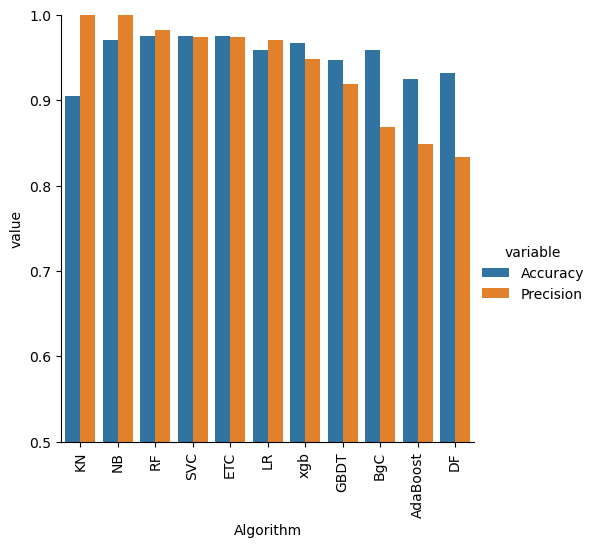

In [80]:
sns.catplot(x='Algorithm', y='value',
            hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [81]:
#model improvement
#1. Change the max_features parameter of the tfIdf

In [82]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [83]:
temp_df=pd.DataFrame({'Algorithm':list(clfs.keys()), 'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling', ascending=False)

In [84]:
new_df=performance_df.merge(temp_df, on='Algorithm')

In [85]:
new_df_scaled=new_df.merge(temp_df, on='Algorithm')

In [86]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_max_ft_3000':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [87]:
new_df_scaled.merge(temp_df, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_max_ft_3000,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276
7,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
8,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,AdaBoost,0.924565,0.848837,0.924565,0.848837,0.924565,0.848837,0.924565,0.848837


In [88]:
#voting classifier
svc= SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb= MultinomialNB()
etc= ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [89]:
voting=VotingClassifier(estimators=[('svm', svc), ('nb',mnb), ('et',etc)],voting='soft')

In [90]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [91]:
y_pred=voting.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))


Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [92]:
#Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [93]:
from sklearn.ensemble import StackingClassifier

In [94]:
clf=StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [95]:
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9816247582205029
Precision 0.9541984732824428


In [96]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb')) #wb=write binary
pickle.dump(mnb, open('model.pkl','wb'))